In [47]:
import numpy as np
import pandas as pd
import networkx as nx
from martignac.workflows.system_generation.solute_in_bilayer import project
from martignac.nomad.workflows import NomadWorkflow
import matplotlib.pyplot as plt

In [48]:
project.to_dataframe().sort_values("sp.depth_from_bilayer_core")

,sp.type,sp.lipids,sp.solute_name,sp.depth_from_bilayer_core,doc.SoluteInBilayerFlow,doc.SoluteGenFlow,doc.BilayerGenFlow,doc.nomad_dataset_id
56bc2ca8970da43c728667710d2b8421,solute_in_bilayer,"[{'name': 'POPC', 'fraction': 1.0}]",C4,1.6,"{'files_symlinked': True, 'fetched_nomad': Tru...","{'files_symlinked': True, 'fetched_nomad': Tru...","{'files_symlinked': True, 'fetched_nomad': Tru...",HJdEI1q4SV-c5Di43BTT_Q


In [49]:
jobs = list(project.find_jobs())
jobs

[Job(project=SoluteInBilayerFlow('/Users/bereau/work/projects/martignac/workspaces/solute_in_bilayer'), statepoint={'type': 'solute_in_bilayer', 'lipids': [{'name': 'POPC', 'fraction': 1.0}], 'solute_name': 'C4', 'depth_from_bilayer_core': 1.6})]

In [50]:
pmf_profile = np.load(jobs[0].fn("wham_bstrap.npy"))
pmf_profile.shape

(3, 200)

<ErrorbarContainer object of 3 artists>

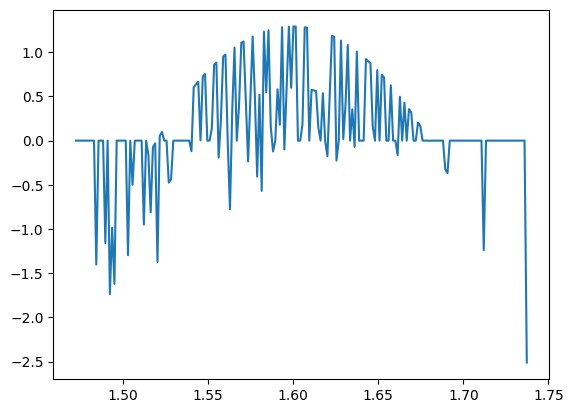

In [51]:
plt.errorbar(
    pmf_profile[0], pmf_profile[1], yerr=pmf_profile[2]
)

In [53]:
counts = np.load(jobs[0].fn("wham_hist.npy"))
counts.shape

(2, 200)

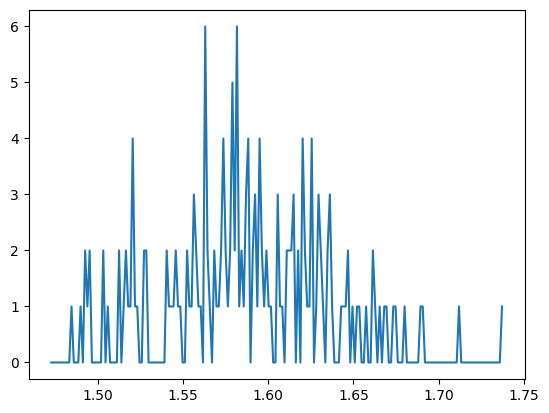

In [54]:
for i in range(1, counts.shape[0]):
    plt.plot(counts[0], counts[i])